In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/groceries-data-set/Groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [3]:
df.sample(4)

,Member_number,Date,itemDescription
29143,4019,31-10-2014,rum
10911,2518,06-12-2014,oil
3632,3592,14-12-2015,oil
6432,4883,16-01-2015,other vegetables


In [4]:
df.tail(4)

,Member_number,Date,itemDescription
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice
38764,1521,26-12-2014,cat food


In [5]:
df.columns

Index(['Member_number', 'Date', 'itemDescription'], dtype='object')

In [6]:
len(df.columns)

3

In [7]:
df.shape

(38765, 3)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [9]:
df.dtypes

Member_number       int64
Date               object
itemDescription    object
dtype: object

In [10]:
df.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [11]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [12]:
df.duplicated().sum()

759

In [13]:
duplicates = df.duplicated().sum()
print(duplicates)

759


In [14]:
if duplicates > 0 :
    print(" Removing duplicate rows----")
    df = df.drop_duplicates().reset_index(drop=True)
    print(f"Dataset shape after removing dupliates: {df.shape}")

 Removing duplicate rows----
Dataset shape after removing dupliates: (38006, 3)


In [15]:
print("\n Missing values per column:")
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing, 
    'Missing %': missing_percent.round(2)
    
})
print(missing_df[missing_df['Missing Count'] > 0])


 Missing values per column:
Empty DataFrame
Columns: [Missing Count, Missing %]
Index: []


In [16]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.month_name()
df['Day_of_Week'] = df['Date'].dt.day_name()
df['Day'] = df['Date'].dt.day

In [17]:
df.dtypes

Member_number               int64
Date               datetime64[ns]
itemDescription            object
Year                        int32
Month                       int32
Month_Name                 object
Day_of_Week                object
Day                         int32
dtype: object

In [18]:
df.columns


Index(['Member_number', 'Date', 'itemDescription', 'Year', 'Month',
       'Month_Name', 'Day_of_Week', 'Day'],
      dtype='object')

In [19]:
df.sample(5)

,Member_number,Date,itemDescription,Year,Month,Month_Name,Day_of_Week,Day
24354,2106,2015-11-24,baking powder,2015,11,November,Tuesday,24
4485,1969,2015-02-11,citrus fruit,2015,2,February,Wednesday,11
26858,1169,2014-01-15,rolls/buns,2014,1,January,Wednesday,15
3177,4231,2015-01-11,chicken,2015,1,January,Sunday,11
20515,4845,2015-08-28,beef,2015,8,August,Friday,28


In [20]:

#Let's find the unique number of members
print("So the number of unique member is:- ",df['Member_number'].nunique())

#Let's find the number of unique items
print("So the number of unique items is:- ",df['itemDescription'].nunique())

So the number of unique member is:-  3898
So the number of unique items is:-  167


In [21]:
#Lets find the top 20 most frequently purchased items
top_items = df['itemDescription'].value_counts().head(20)
print("The top 20 most frequently purchased items are:- ", top_items)

The top 20 most frequently purchased items are:-  itemDescription
whole milk            2363
other vegetables      1827
rolls/buns            1646
soda                  1453
yogurt                1285
root vegetables       1041
tropical fruit        1014
bottled water          908
sausage                903
citrus fruit           795
pastry                 774
pip fruit              734
shopping bags          712
canned beer            702
bottled beer           678
whipped/sour cream     654
newspapers             582
frankfurter            565
brown bread            563
pork                   555
Name: count, dtype: int64


In [22]:
# So now lets take out the top 3 Most Purchased items
top_item = df['itemDescription'].value_counts().head(5)
print("The top 3 most frequently purchased items are :- ", top_item)

The top 3 most frequently purchased items are :-  itemDescription
whole milk          2363
other vegetables    1827
rolls/buns          1646
soda                1453
yogurt              1285
Name: count, dtype: int64


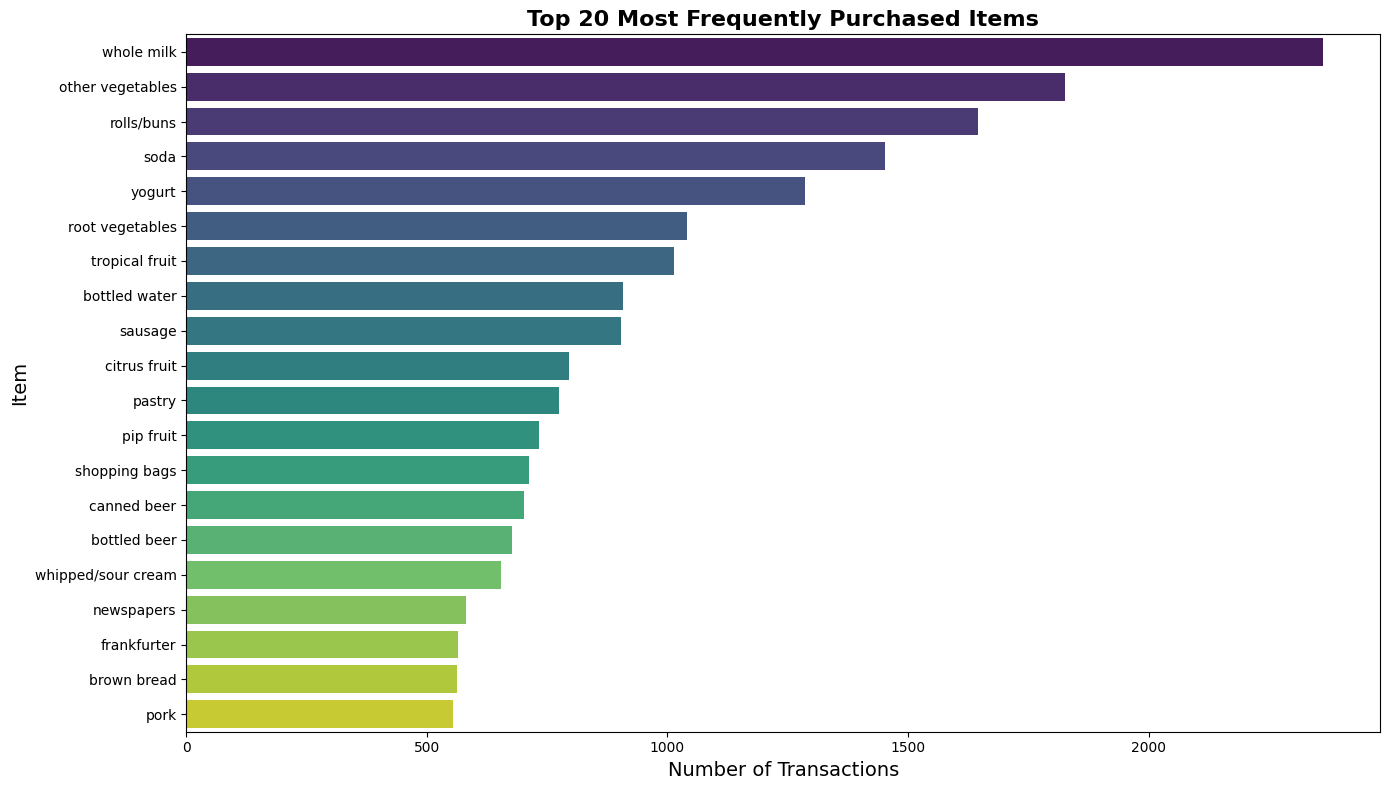

In [23]:
# --- Visualize Top 20 Items ---
plt.figure(figsize=(14, 8))
sns.barplot(y=top_items.index, x=top_items.values, palette='viridis')
plt.title('Top 20 Most Frequently Purchased Items', fontsize=16, weight='bold')
plt.xlabel('Number of Transactions', fontsize=14)
plt.ylabel('Item', fontsize=14)
plt.tight_layout()
plt.show()


📈 Analyzing Transactions Over Time...


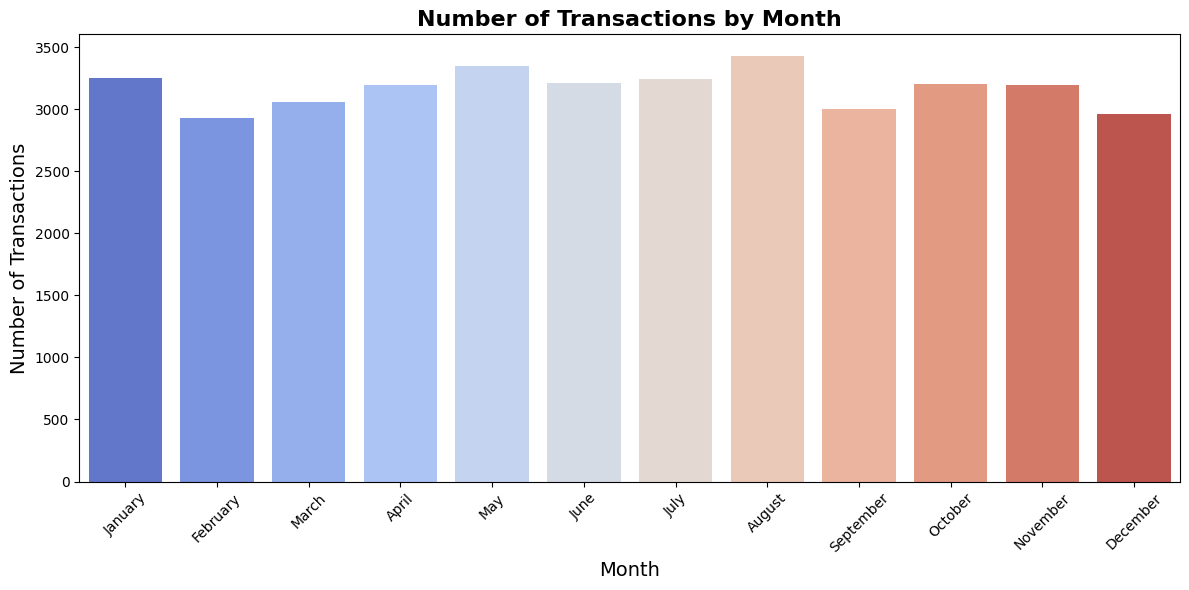

In [24]:
print("\n📈 Analyzing Transactions Over Time...")

# By Month
monthly_sales = df.groupby('Month_Name').size().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='coolwarm')
plt.title('Number of Transactions by Month', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

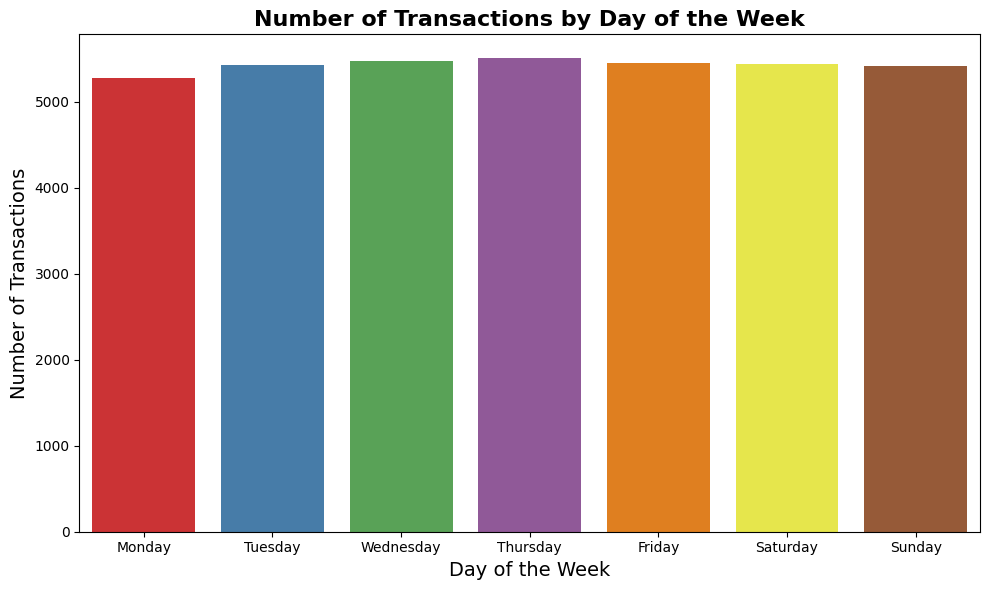

In [25]:
# By Day of Week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales = df.groupby('Day_of_Week').size().reindex(day_order)

plt.figure(figsize=(10, 6))
sns.barplot(x=daily_sales.index, y=daily_sales.values, palette='Set1')
plt.title('Number of Transactions by Day of the Week', fontsize=16, weight='bold')
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)
plt.tight_layout()
plt.show()


🧺 Calculating Average Basket Size (Items per Transaction)...
📊 Average Basket Size: 2.54 items per transaction
📊 Median Basket Size: 2 items per transaction
📊 Min Basket Size: 1 item(s)
📊 Max Basket Size: 10 items


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


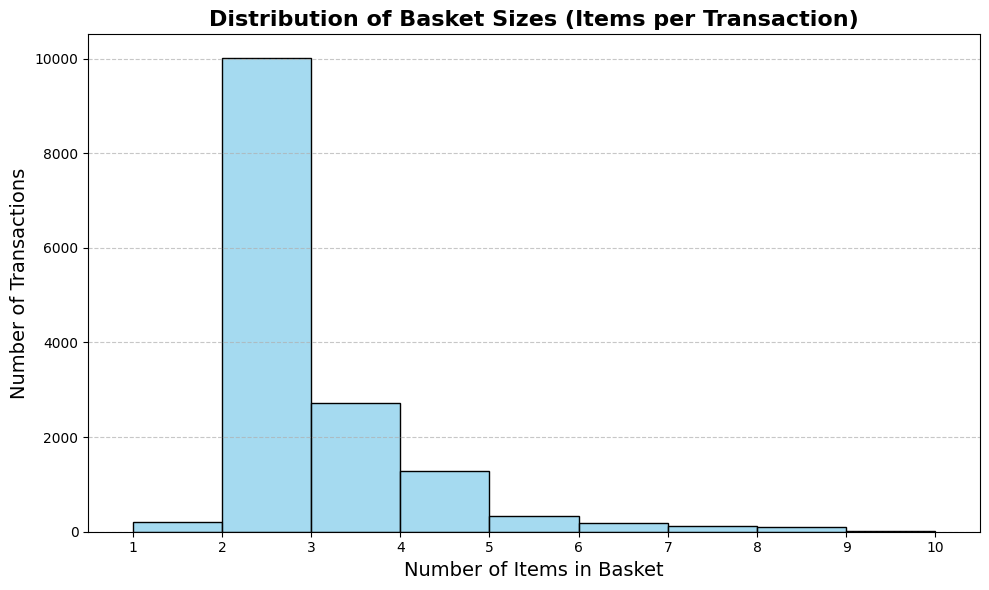

In [26]:
print("\n🧺 Calculating Average Basket Size (Items per Transaction)...")

# Create a unique transaction ID (Member + Date)
df['Transaction_ID'] = df['Member_number'].astype(str) + "_" + df['Date'].dt.strftime('%Y-%m-%d')

basket_sizes = df.groupby('Transaction_ID').size()

print(f"📊 Average Basket Size: {basket_sizes.mean():.2f} items per transaction")
print(f"📊 Median Basket Size: {basket_sizes.median():.0f} items per transaction")
print(f"📊 Min Basket Size: {basket_sizes.min():.0f} item(s)")
print(f"📊 Max Basket Size: {basket_sizes.max():.0f} items")

# Visualize Basket Size Distribution
plt.figure(figsize=(10, 6))
sns.histplot(basket_sizes, bins=range(1, basket_sizes.max()+1), kde=False, color='skyblue', edgecolor='black')
plt.title('Distribution of Basket Sizes (Items per Transaction)', fontsize=16, weight='bold')
plt.xlabel('Number of Items in Basket', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)
plt.xticks(range(1, min(21, basket_sizes.max()+1))) # Show ticks for first 20 or max
plt.xlim(0.5, min(20.5, basket_sizes.max()+0.5)) # Limit x-axis for better view
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()